<a href="https://colab.research.google.com/github/YuHsin-Chen1221/Deep-Learning-with-Bioinformatics/blob/main/RIN_Visualize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install biopython networkx matplotlib py3Dmol

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 20.4 MB/s eta 0:00:00


In [ ]:
# loading PDB files

import requests

pdb_id = "4d1m"
url = f"https://files.rcsb.org/download/{pdb_id}.cif"

with open(f"{pdb_id}.cif", "w") as f:
    f.write(requests.get(url).text)

from Bio.PDB import MMCIFParser

def load_structure(file_path):
    parser = MMCIFParser(QUIET=True)
    structure = parser.get_structure("protein", file_path)
    return structure
structure = load_structure(f"{pdb_id}.cif")


/usr/local/lib/python3.11/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning:


/usr/local/lib/python3.11/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning:


/usr/local/lib/python3.11/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning:


/usr/local/lib/python3.11/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning:


/usr/local/lib/python3.11/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning:


/usr/local/lib/python3.11/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning:


/usr/local/lib/python3.11/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning:


/usr/local/lib/python3.11/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning:


/usr/local/lib/python3.11/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning:


/usr/local/lib/python3.11/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning:


/usr/local

ValueError: Reading format 'pdb-atom' is supported, but not writing

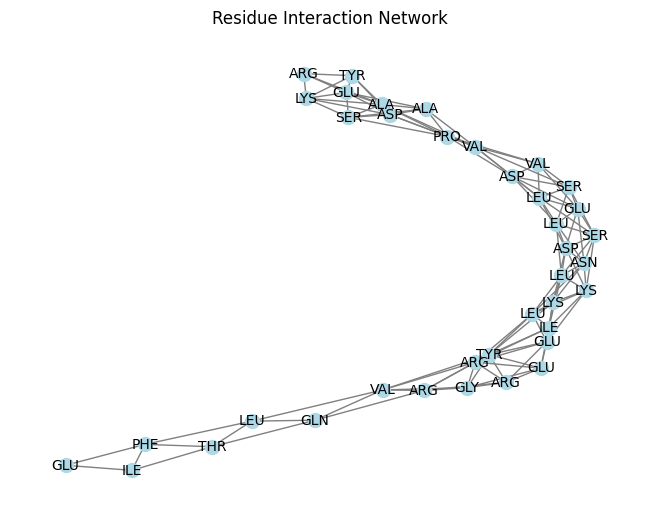

In [ ]:
# building RIN 2D graph with matplot
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def build_residue_graph(structure, chain_id='A', threshold=8.0):
    model = next(structure.get_models())
    chain = model[chain_id]
    residues = [res for res in chain if is_aa(res)]

    graph = nx.Graph()
    for i, res1 in enumerate(residues):
        res1_id = res1.get_id()[1]
        graph.add_node(res1_id, label=res1.get_resname())
        for j, res2 in enumerate(residues[i+1:], start=i+1):
            res2_id = res2.get_id()[1]
            try:
                c1 = res1['CA'].get_coord()
                c2 = res2['CA'].get_coord()
                distance = np.linalg.norm(c1 - c2)
                if distance <= threshold:
                    graph.add_edge(res1_id, res2_id, weight=distance)
            except KeyError:
                continue
    return graph

def draw_rin(graph):
    pos = nx.spring_layout(graph, seed=42)
    labels = nx.get_node_attributes(graph, 'label')
    nx.draw(graph, pos, with_labels=True, labels=labels, node_color='lightblue', edge_color='gray', node_size=100, font_size=10)
    plt.title("Residue Interaction Network")
    plt.show()

graph = build_residue_graph(structure)
draw_rin(graph)

In [ ]:
!pip install plotly

In [ ]:
# building RIN 3D interactive graph with Plotly

from Bio.PDB import Atom, Model, Chain, Residue, Structure, PDBParser
import numpy as np
import plotly.graph_objects as go
from scipy.spatial.distance import pdist, squareform

def get_atoms_from_pdb(pdb_id, cg_atom: str):
    # Use the PDBParser to read the file
    parser = PDBParser()
    all_atoms = []
    # Instantiate the structure
    structure = parser.get_structure("", f"{pdb_id}.pdb")
    # Loop over the structure, the chains, the residue and the atoms
    for model in structure:
        for chain in model:
            for residue in chain:
                for atom in residue:
              # Get coordinates only if this is the good atom
                    if atom.get_name() == cg_atom:
                  # Get the coordinates in (x,y,z)
                        all_atoms.append(atom.get_coord().tolist())
    # Return a np.array
    return np.array(all_atoms)


def build_edges(atoms, threshold=8.0):
    """Returns a list of (x, y, z) line segments for edges between atoms within threshold"""
    dist_matrix = squareform(pdist(atoms))
    edges_x, edges_y, edges_z = [], [], []
    for i in range(len(atoms)):
        for j in range(i+1, len(atoms)):
            if dist_matrix[i][j] < threshold:
                xi, yi, zi = atoms[i]
                xj, yj, zj = atoms[j]
                # Create a short line between two atoms
                edges_x += [xi, xj, None]
                edges_y += [yi, yj, None]
                edges_z += [zi, zj, None]
    return edges_x, edges_y, edges_z

def visualise_3d(atoms: np.ndarray):
    edges_x, edges_y, edges_z = build_edges(atoms)
    atoms = np.array(atoms).reshape(-1, 3)
    fig = go.Figure()

    # Atoms
    fig.add_trace(go.Scatter3d(
        x=atoms[:, 0], y=atoms[:, 1], z=atoms[:, 2],
        mode='markers',
        marker=dict(size=1, color='gray'),
        name='Atoms'
    ))

    # Edges
    fig.add_trace(go.Scatter3d(
        x=edges_x, y=edges_y, z=edges_z,
        mode='lines',
        line=dict(color='gray', width=1),
        name='Edges (<8Å)'
    ))

    fig.update_layout(scene=dict(
    xaxis=dict(visible=False),
    yaxis=dict(visible=False),
    zaxis=dict(visible=False)
    ))

    fig.show()


pdb_id = "4d1m"
all_atoms = get_atoms_from_pdb(pdb_id, "CA")
visualise_3d(all_atoms)


/usr/local/lib/python3.11/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning:


/usr/local/lib/python3.11/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning:


/usr/local/lib/python3.11/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning:


/usr/local/lib/python3.11/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning:


/usr/local/lib/python3.11/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning:


/usr/local/lib/python3.11/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning:


/usr/local/lib/python3.11/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning:


/usr/local/lib/python3.11/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning:


/usr/local/lib/python3.11/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning:


/usr/local/lib/python3.11/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning:


/usr/local

In [ ]:
from Bio.PDB import PDBParser
import numpy as np
import plotly.graph_objects as go
from scipy.spatial.distance import pdist, squareform

# Residue groups and their colors
residue_colors = {
    'hydrophobic': 'orange',
    'polar': 'skyblue',
    'acidic': 'red',
    'basic': 'blue',
    'special': 'green'
}

residue_groups = {
    'hydrophobic': ['ALA', 'VAL', 'ILE', 'LEU', 'MET', 'PHE', 'TRP'],
    'polar':       ['SER', 'THR', 'ASN', 'GLN', 'TYR', 'CYS'],
    'acidic':      ['ASP', 'GLU'],
    'basic':       ['LYS', 'ARG', 'HIS'],
    'special':     ['GLY', 'PRO']
}

def get_group_color(res_name):
    for group, residues in residue_groups.items():
        if res_name in residues:
            return residue_colors[group]

def get_residue_coords_and_colors(pdb_id, chain_id=None):
    parser = PDBParser(QUIET=True)
    structure = parser.get_structure(pdb_id, f"{pdb_id}.pdb")

    coords, labels, colors = [], [], []
    for model in structure:
        for chain in model:
            if chain_id and chain.id != chain_id:
                continue
            for residue in chain:
                if 'CA' in residue:
                    ca_atom = residue['CA']
                    coords.append(ca_atom.get_coord())
                    res_name = residue.get_resname()
                    res_id = residue.id[1]
                    labels.append(f"{res_name}{res_id}")
                    colors.append(get_group_color(res_name))
    return np.array(coords), labels, colors

def build_edges(atoms, threshold=8.0):
    dist_matrix = squareform(pdist(atoms))
    edges_x, edges_y, edges_z = [], [], []
    for i in range(len(atoms)):
        for j in range(i + 1, len(atoms)):
            if dist_matrix[i][j] < threshold:
                xi, yi, zi = atoms[i]
                xj, yj, zj = atoms[j]
                edges_x += [xi, xj, None]
                edges_y += [yi, yj, None]
                edges_z += [zi, zj, None]
    return edges_x, edges_y, edges_z

def visualise_residue_network(coords, labels, colors, atom_size=5, edge_threshold=8.0):
    edges_x, edges_y, edges_z = build_edges(coords, threshold=edge_threshold)

    fig = go.Figure()

    # Residue nodes
    fig.add_trace(go.Scatter3d(
        x=coords[:, 0],
        y=coords[:, 1],
        z=coords[:, 2],
        mode='markers+text',
        textposition='top center',
        marker=dict(
            size=atom_size,
            color=colors,
            line=dict(width=1, color='black')
        ),
        name='Residues'
    ))

    # Edges
    fig.add_trace(go.Scatter3d(
        x=edges_x,
        y=edges_y,
        z=edges_z,
        mode='lines',
        line=dict(color='gray', width=2),
        name='Interactions (<8Å)'
    ))

    fig.show()

# === Run ===
pdb_id = "4d1m"
coords, labels, colors = get_residue_coords_and_colors(pdb_id)
visualise_residue_network(coords, labels, colors)
